In [1]:
import pandas as pd
df_raw = pd.read_json('https://api.covid19india.org/states_daily.json')

vals = [dict(v[0]) for v in df_raw.values]
df_daily_states = pd.DataFrame(vals)
df_daily_states.drop(columns='tt', inplace=True)
df_daily_states.tail()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,py,rj,sk,status,tg,tn,tr,up,ut,wb
151,6,47,0,0,7,0,0,03-May-20,0,106,...,1,114,0,Recovered,46,38,0,56,0,-19
152,0,0,0,0,0,1,0,03-May-20,0,0,...,0,3,0,Deceased,0,1,0,0,0,74
153,0,67,0,0,11,5,1,04-May-20,0,349,...,0,175,0,Confirmed,3,527,13,121,0,61
154,0,36,0,0,0,2,0,04-May-20,0,69,...,0,82,0,Recovered,40,30,0,48,0,86
155,0,0,0,0,0,0,0,04-May-20,0,0,...,0,6,0,Deceased,0,1,0,6,0,11


In [2]:
df_daily_states_confirmed = df_daily_states[df_daily_states['status'] == 'Confirmed']
df_daily_states_recovered = df_daily_states[df_daily_states['status'] == 'Recovered']
df_daily_states_deceased = df_daily_states[df_daily_states['status'] == 'Deceased']


In [3]:
state_list=list(set(df_daily_states_confirmed.columns) - {'status', 'date'})


In [4]:
for state in state_list:
    df_daily_states_confirmed[state] = pd.to_numeric(df_daily_states_confirmed[state]).cumsum()
    df_daily_states_recovered[state] = pd.to_numeric(df_daily_states_recovered[state]).cumsum()
    df_daily_states_deceased[state] = pd.to_numeric(df_daily_states_deceased[state]).cumsum()


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [5]:
df_daily_states_confirmed.reset_index(drop=True, inplace=True)
df_daily_states_recovered.reset_index(drop=True, inplace=True)
df_daily_states_deceased.reset_index(drop=True, inplace=True)


In [6]:
df_final = df_daily_states_confirmed[state_list].iloc[-1].reset_index()
df_final.columns=['State', 'Total']
df_final.Total = pd.to_numeric(df_final.Total)
df_final.sort_values(by = 'Total', inplace=True, ascending=False)   

In [7]:
top_10_states = list(df_final.State[:10])

In [8]:
df_recover_rate = pd.DataFrame()
df_recover_rate['date'] = df_daily_states_deceased['date']

In [9]:
for state in top_10_states:
    df_recover_rate[state] = df_daily_states_recovered[state] / \
        (df_daily_states_recovered[state] + df_daily_states_deceased[state])

In [10]:
df_recover_rate.to_csv('latest_recovery_rate.csv')
df_recover_rate.tail()

,date,mh,gj,dl,tn,rj,mp,up,ap,wb,pb
47,30-Apr-20,0.794711,0.741233,0.948829,0.978988,0.939012,0.777419,0.932318,0.911932,0.789809,0.838710
48,01-May-20,0.795176,0.757202,0.950326,0.979104,0.947368,0.782090,0.939655,0.924312,0.772222,0.843750
49,02-May-20,0.793651,0.773748,0.951515,0.978832,0.948092,0.804124,0.941970,0.930380,0.758794,0.848485
50,03-May-20,0.794515,0.782282,0.955119,0.978708,0.950245,0.835602,0.946048,0.936660,0.519685,0.847826
51,04-May-20,0.808992,0.789300,0.957191,0.978472,0.949175,0.837573,0.942421,0.940754,0.621083,0.847682


In [57]:
import matplotlib.pyplot as plt
df_recover_rate.tail()

,date,mh,gj,dl,tn,rj,mp,up,ap,wb,pb
47,30-Apr-20,0.794711,0.741233,0.948829,0.978988,0.939012,0.777419,0.932318,0.911932,0.789809,0.838710
48,01-May-20,0.795176,0.757202,0.950326,0.979104,0.947368,0.782090,0.939655,0.924312,0.772222,0.843750
49,02-May-20,0.793651,0.773748,0.951515,0.978832,0.948092,0.804124,0.941970,0.930380,0.758794,0.848485
50,03-May-20,0.794515,0.782282,0.955119,0.978708,0.950245,0.835602,0.946048,0.936660,0.519685,0.847826
51,04-May-20,0.808992,0.789300,0.957191,0.978472,0.949175,0.837573,0.942421,0.940754,0.621083,0.847682


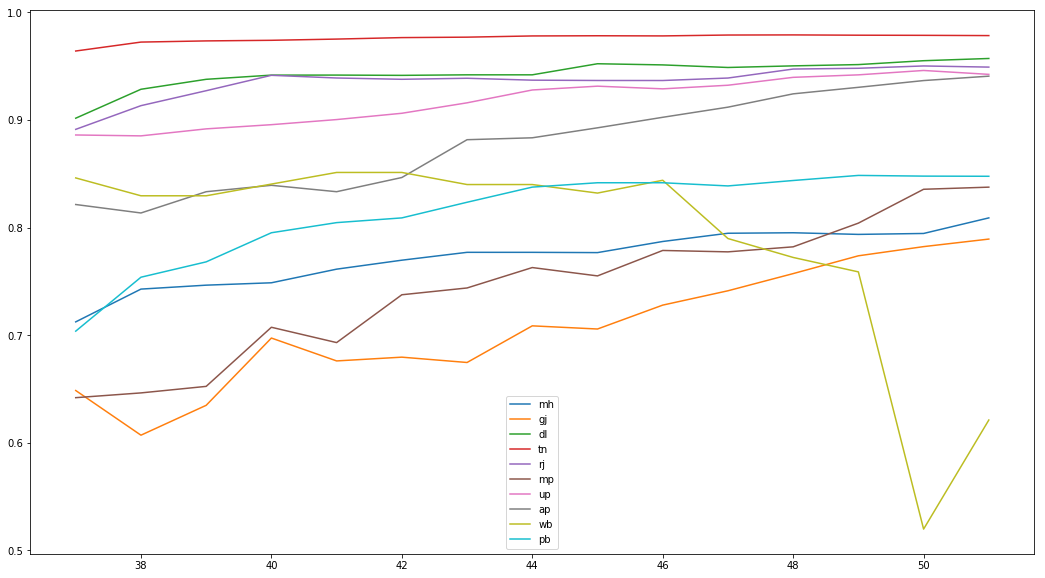

In [61]:
plt.figure(figsize=(18, 10))
plt.plot(df_recover_rate[top_10_states].tail(15))
plt.legend(top_10_states)
plt.show()

In [13]:
df_recover_rate[top_10_states].tail(1)

,mh,gj,dl,tn,rj,mp,up,ap,wb,pb
51,0.808992,0.7893,0.957191,0.978472,0.949175,0.837573,0.942421,0.940754,0.621083,0.847682


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_latest=df_recover_rate[top_10_states].tail(1).transpose().reset_index()
df_latest.columns=['State', 'Recovery Rate']
df_latest['Recovery Rate']  = 100 * df_latest['Recovery Rate'] 
df_latest.sort_values(by='Recovery Rate', inplace=True)
df_latest

,State,Recovery Rate
8,wb,62.108262
1,gj,78.929987
0,mh,80.899245
5,mp,83.757339
9,pb,84.768212
7,ap,94.075404
6,up,94.242068
4,rj,94.917492
2,dl,95.719064
3,tn,97.847222


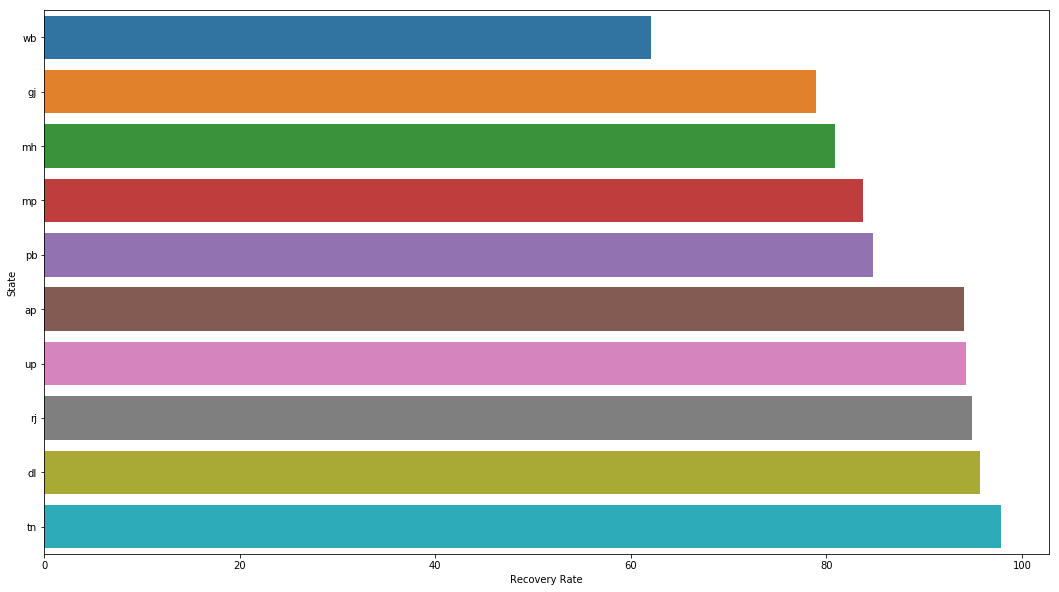

In [17]:
plt.figure(figsize=(18, 10))
sns.barplot(y='State', x='Recovery Rate', data=df_latest)

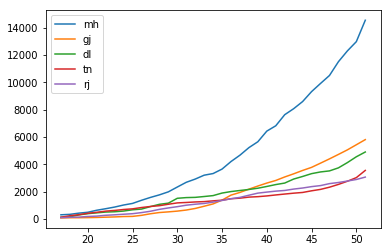

In [18]:
df_daily_states_confirmed[top_10_states[:5]].tail(35).plot()

In [19]:
import seaborn as sns

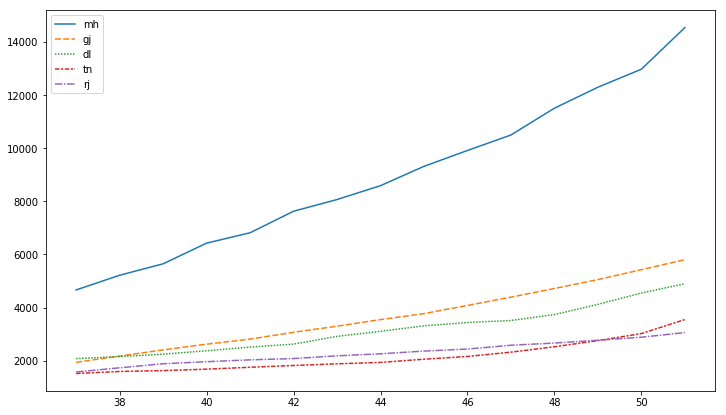

In [38]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_daily_states_confirmed[top_10_states[:5]].tail(15))

In [22]:
df_daily_states_recovered[top_10_states + ['date']].tail()

,mh,gj,dl,tn,rj,mp,up,ap,wb,pb,date
47,1773,613,1094,1258,893,482,551,321,124,104,30-Apr-20
48,1879,736,1167,1312,1116,524,654,403,139,108,01-May-20
49,2000,896,1256,1341,1242,624,698,441,151,112,02-May-20
50,2115,1042,1362,1379,1356,798,754,488,132,117,03-May-20
51,2465,1195,1431,1409,1438,856,802,524,218,128,04-May-20


In [23]:
df_last10=df_daily_states_confirmed[top_10_states + ['date']].tail(25).head(24)
#df_last10.set_index('date', inplace=True)
melted=df_last10.melt(id_vars=['date'], value_vars=top_10_states)
melted.columns=['date', 'state_code', 'confirmed']
melted[::-1].head()

,date,state_code,confirmed
239,03-May-20,pb,1102.0
238,02-May-20,pb,772.0
237,01-May-20,pb,585.0
236,30-Apr-20,pb,480.0
235,29-Apr-20,pb,375.0


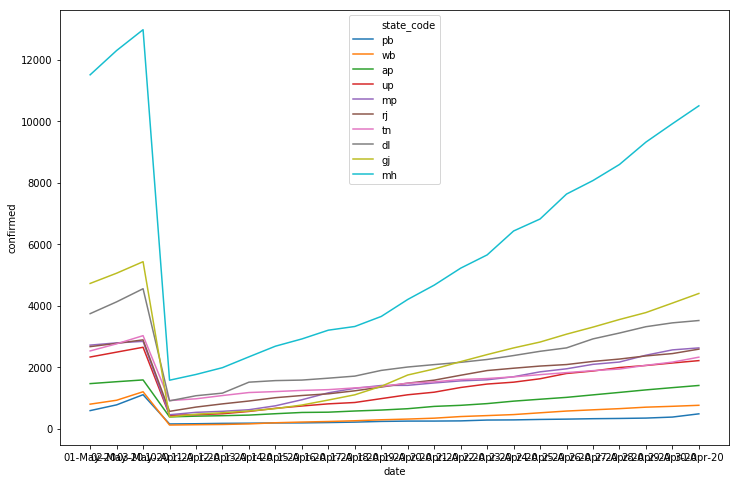

In [35]:
plt.figure(figsize=(12, 8))
f=sns.lineplot(y='confirmed', x='date', hue='state_code', data=melted[::-1])
plt.show()

In [25]:
df_daily_states_confirmed.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,py,rj,sk,status,tg,tn,tr,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,3,0,Confirmed,1,1,0,12,0,0
1,0,1,0,0,0,0,0,15-Mar-20,0,7,...,0,4,0,Confirmed,3,1,0,13,0,0
2,0,1,0,0,0,0,0,16-Mar-20,0,7,...,1,4,0,Confirmed,4,1,0,13,1,0
3,0,1,0,0,0,0,0,17-Mar-20,0,8,...,1,4,0,Confirmed,5,1,0,15,1,1
4,0,1,0,0,0,0,0,18-Mar-20,0,10,...,1,7,0,Confirmed,13,2,0,17,2,1


In [26]:
state_codes = [st for st in list(df_daily_states_confirmed.columns) if len(st)==2]
df_daily_states_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 39 columns):
an        52 non-null int64
ap        52 non-null int64
ar        52 non-null int64
as        52 non-null int64
br        52 non-null int64
ch        52 non-null int64
ct        52 non-null int64
date      52 non-null object
dd        52 non-null int64
dl        52 non-null int64
dn        52 non-null int64
ga        52 non-null int64
gj        52 non-null int64
hp        52 non-null int64
hr        52 non-null int64
jh        52 non-null int64
jk        52 non-null int64
ka        52 non-null int64
kl        52 non-null int64
la        52 non-null int64
ld        52 non-null int64
mh        52 non-null int64
ml        52 non-null int64
mn        52 non-null int64
mp        51 non-null float64
mz        52 non-null int64
nl        52 non-null int64
or        52 non-null int64
pb        52 non-null int64
py        52 non-null int64
rj        52 non-null int64
sk        52 non-null int6

In [27]:
import numpy as np
df_percent = df_daily_states_confirmed.copy()

In [28]:
df_percent['Total'] = df_percent.sum(axis=1)
df_percent.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,rj,sk,status,tg,tn,tr,up,ut,wb,Total
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,3,0,Confirmed,1,1,0,12,0,0,81.0
1,0,1,0,0,0,0,0,15-Mar-20,0,7,...,4,0,Confirmed,3,1,0,13,0,0,108.0
2,0,1,0,0,0,0,0,16-Mar-20,0,7,...,4,0,Confirmed,4,1,0,13,1,0,123.0
3,0,1,0,0,0,0,0,17-Mar-20,0,8,...,4,0,Confirmed,5,1,0,15,1,1,134.0
4,0,1,0,0,0,0,0,18-Mar-20,0,10,...,7,0,Confirmed,13,2,0,17,2,1,171.0


In [29]:
for state in state_codes:
    df_percent[state] = round(100*df_percent[state] / df_percent.Total, 2)
df_percent.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,rj,sk,status,tg,tn,tr,up,ut,wb,Total
0,0.0,1.23,0.0,0.0,0.0,0.0,0.0,14-Mar-20,0.0,8.64,...,3.70,0.0,Confirmed,1.23,1.23,0.0,14.81,0.00,0.00,81.0
1,0.0,0.93,0.0,0.0,0.0,0.0,0.0,15-Mar-20,0.0,6.48,...,3.70,0.0,Confirmed,2.78,0.93,0.0,12.04,0.00,0.00,108.0
2,0.0,0.81,0.0,0.0,0.0,0.0,0.0,16-Mar-20,0.0,5.69,...,3.25,0.0,Confirmed,3.25,0.81,0.0,10.57,0.81,0.00,123.0
3,0.0,0.75,0.0,0.0,0.0,0.0,0.0,17-Mar-20,0.0,5.97,...,2.99,0.0,Confirmed,3.73,0.75,0.0,11.19,0.75,0.75,134.0
4,0.0,0.58,0.0,0.0,0.0,0.0,0.0,18-Mar-20,0.0,5.85,...,4.09,0.0,Confirmed,7.60,1.17,0.0,9.94,1.17,0.58,171.0


<Figure size 864x720 with 0 Axes>

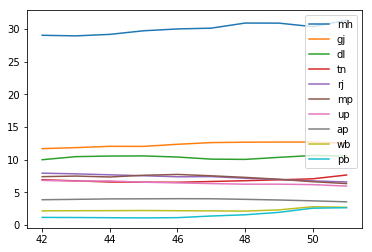

In [62]:
plt.figure(figsize=(12, 10))
df_percent[top_10_states].tail(10).plot()
plt.show()

## Growth rate

In [47]:
df_growthrate = df_daily_states_confirmed[['date']].copy()
df_growthrate[state_codes] = 100 * df_daily_states_confirmed[state_codes].pct_change()
df_growthrate.tail()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,pb,py,rj,sk,tg,tn,tr,up,ut,wb
47,30-Apr-20,0.0,5.330330,0.0,13.157895,5.459057,8.823529,5.263158,NaN,2.209945,...,28.000000,0.0,5.901639,NaN,2.165354,7.446809,0.00,3.608247,3.636364,4.551724
48,01-May-20,0.0,4.276550,0.0,0.000000,9.647059,18.918919,7.500000,NaN,6.344239,...,21.875000,0.0,3.173375,NaN,0.578035,8.738700,0.00,5.291723,0.000000,4.881266
49,02-May-20,0.0,4.237867,0.0,0.000000,3.218884,6.818182,0.000000,NaN,10.272873,...,31.965812,50.0,3.975994,NaN,1.628352,9.144893,100.00,6.829897,3.508772,15.974843
50,03-May-20,0.0,3.803279,0.0,0.000000,7.484407,18.085106,0.000000,NaN,10.359049,...,42.746114,0.0,4.112554,NaN,1.979265,9.648168,300.00,6.353036,1.694915,29.934924
51,04-May-20,0.0,4.232470,0.0,0.000000,2.127660,4.504505,2.325581,NaN,7.672016,...,11.796733,0.0,6.063756,NaN,0.277264,17.433014,81.25,4.574669,0.000000,5.091820


Text(0.5, 1.0, 'Corona Growth rate in Indian states')

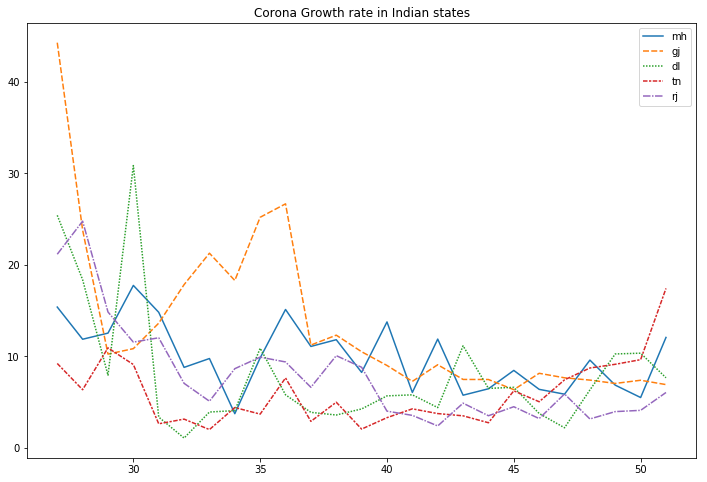

In [55]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_growthrate[top_10_states[:5]].tail(25))
#plt.plot(df_growthrate.date.tail(15), df_growthrate[top_10_states].tail(15))
plt.title('Corona Growth rate in Indian states')